# Stock Data
A stock is a general term used to describe the ownership certificates of any company. A share, on the other hand, refers to the stock certificate of a particular company. Holding a particular company's share makes you a shareholder. [https://economictimes.indiatimes.com/definition/stocks]

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
# Devon Energy Corp
Devon= yf.Ticker("DVN")

In [4]:
Devon_info = Devon.info
Devon_info

{'zip': '73102-5015',
 'sector': 'Energy',
 'fullTimeEmployees': 1600,
 'longBusinessSummary': 'Devon Energy Corporation, an independent energy company, primarily engages in the exploration, development, and production of oil, natural gas, and natural gas liquids in the United States. It operates approximately 5,134 gross wells. Devon Energy Corporation was incorporated in 1971 and is headquartered in Oklahoma City, Oklahoma.',
 'city': 'Oklahoma City',
 'phone': '405 235 3611',
 'state': 'OK',
 'country': 'United States',
 'companyOfficers': [],
 'website': 'https://www.devonenergy.com',
 'maxAge': 1,
 'address1': '333 West Sheridan Avenue',
 'industry': 'Oil & Gas E&P',
 'ebitdaMargins': 0.41984,
 'profitMargins': 0.21445,
 'grossMargins': 0.56522,
 'operatingCashflow': 4898999808,
 'revenueGrowth': 2.003,
 'operatingMargins': 0.25288,
 'ebitda': 5506999808,
 'targetLowPrice': 60,
 'recommendationKey': 'buy',
 'grossProfits': 7414000000,
 'freeCashflow': 2805625088,
 'targetMedianPri

In [7]:
Devon_info['country']

'United States'

In [8]:
Devon_share_price_data = Devon.history(period="max")

In [9]:
Devon_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-07-22,0.0,3.906927,3.646466,3.906927,59400,0.0,0.0
1985-07-23,0.0,4.037158,3.863517,3.906927,20800,0.0,0.0
1985-07-24,0.0,3.863516,3.733285,3.820106,32600,0.0,0.0
1985-07-25,0.0,3.863515,3.820104,3.863515,16600,0.0,0.0
1985-07-26,0.0,3.863516,3.776695,3.820106,10400,0.0,0.0


In [10]:
Devon_share_price_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

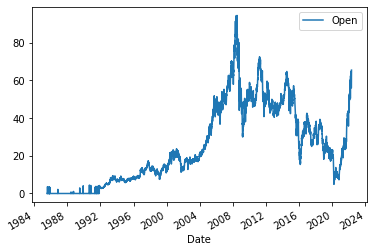

In [11]:
Devon_share_price_data.plot(x="Date", y="Open")

In [12]:
Devon.dividends

Date
1993-06-09    0.015
1993-09-09    0.015
1993-12-09    0.015
1994-03-09    0.015
1994-06-09    0.015
              ...  
2021-03-12    0.300
2021-06-11    0.340
2021-09-10    0.490
2021-12-09    0.840
2022-03-11    1.000
Name: Dividends, Length: 118, dtype: float64

<AxesSubplot:xlabel='Date'>

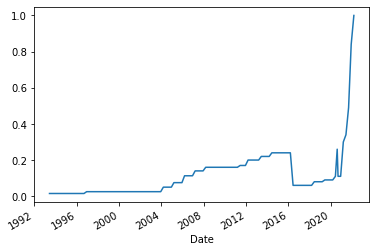

In [13]:
Devon.dividends.plot()

In [ ]:
url2= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url2).text

In [ ]:
devon_revenue = pd.DataFrame(columns=["Date", "Revenue"])

gme_table = soup.find_all('table', attrs={'class': 'historical_data_table table'})

for table in gme_table:
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find_all("tr"):
            col = row.find_all("td") 
            if len(col) == 2: 
                date = col[0].text
                revenue = col[1].text.replace('$', '').replace(',','')
                gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
    
gme_revenue.head()